In [1]:
# Kütüphanelerin yüklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("olimpiyatlar.csv") # Veri setinin yüklenmesi.
df = data.copy() # Veri setinin df'e kopyalanması.

"""
Veride nan değerler var, çıkart veya doldur.
Games column'u gereksiz, dropla.
Madalya kısımındaki nan gözlemleri kayıp veri değil. Madalya alamamış olarak doldur.
Ülke kısaltması veya takım gereksiz dropla.
"""

"\nVeride nan değerler var, çıkart veya doldur.\nGames column'u gereksiz, dropla.\nMadalya kısımındaki nan gözlemleri kayıp veri değil. Madalya alamamış olarak doldur.\nÜlke kısaltması veya takım gereksiz dropla.\n"

In [3]:
# İlk 5 gözlem
print(df.head())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Son 5 gözlem
print(df.tail())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Sütun isimleri
print(df.columns)
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Değişken özellikleri
print(df.info())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Sayısal değişkenlerin istatistikleri
print(df.describe().T)
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Boş değerlerin sayısı
print(df.isnull().sum())

"""
Yaş değişkenini int çevir.
Medal     231333
Age         9474
Height     60171
Weight     62875 boş değerleri var bunları doldur veya dropla.
"""

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

'\nYaş değişkenini int çevir.\nMedal     231333\nAge         9474\nHeight     60171\nWeight     62875 boş değerleri var bunları doldur veya dropla.\n'

In [4]:
# Değişken isimlerinin yeniden isimlendirilmesi.
df.rename(columns={'ID': 'id',
                   'Name': 'isim',
                   'Sex': 'cinsiyet',
                   'Age': 'yas',
                   'Height': 'boy',
                   'Weight': 'kilo',
                   'Team': 'takim',
                   'NOC': 'uok',
                   'Games': 'oyunlar',
                   'Year': 'yil',
                   'Season': 'sezon',
                   'City': 'sehir',
                   'Sport': 'spor',
                   'Event': 'etkinlik',
                   'Medal': 'madalya'
                   }, inplace = True)

# Gereksiz sütunların droplanması.
df = df.drop(columns=["oyunlar"], axis=1)

In [5]:
df.duplicated().value_counts() # Duplicate veriler mevcut.

False    269731
True       1385
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
id,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
yas,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
boy,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
kilo,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
yil,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


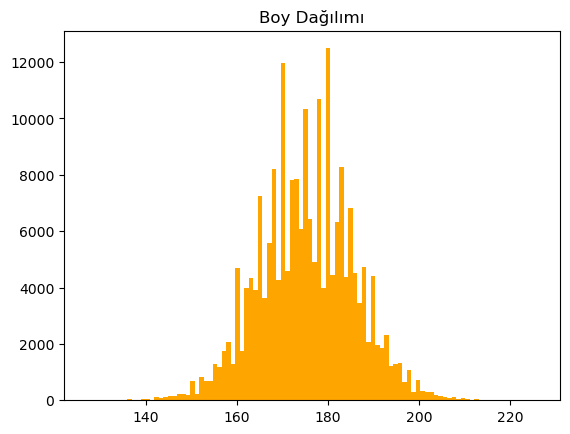

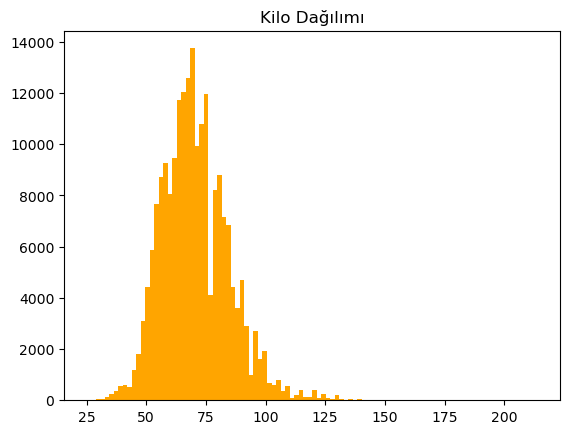

In [6]:
"""
Kayıp Veri Problemi:

Madalya alamayan sporcuları veri setinden çıkartalım.

Boy ve kilo sütununda bulunan kayıp verileri dolduralım.(Etkinlik ile dordurulacak)
Fakat etkinliğin medyanına mı ortalamasına göre mi alacağını kontrol etmemiz gerekiyor.

"""
plt.figure()
plt.hist(df["boy"], bins = 100, color = "orange")
plt.title("Boy Dağılımı")

plt.figure()
plt.hist(df["kilo"], bins = 100, color = "orange")
plt.title("Kilo Dağılımı")

df.describe().T

In [7]:
# Etkinlik durumuna göre boy ve kilo boş değerlerinin doldurulması.

cols = ["boy", "kilo"]

for col in cols:
    df[col] = df.groupby("etkinlik")[col].transform(lambda x: x.fillna(x.mean()))

Text(0.5, 1.0, 'Yaş Dağılımı')

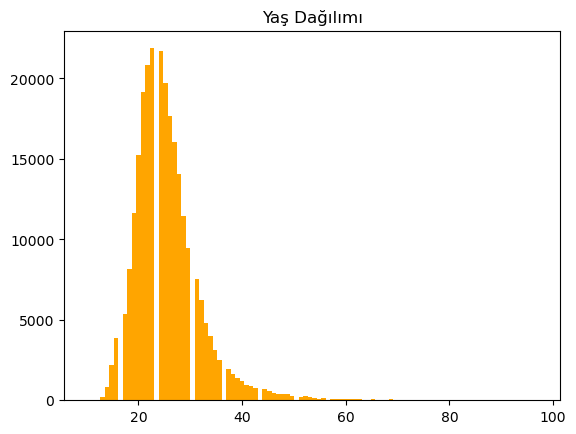

In [8]:
# Yaş dağılımının görselleştirilmesi

plt.figure()
plt.hist(df["yas"], bins = 100, color="orange")
plt.title("Yaş Dağılımı")

In [9]:
# Yas sütunundaki eksik değerleri cinsiyet ve spora göre doldurulması

df["yas"] = df.groupby(["cinsiyet", "spor"])["yas"].transform(lambda x: x.fillna(x.mean()))

# Madalya alamayan sporcuların (NaN) droplanması

df = df.dropna(subset=["madalya"])

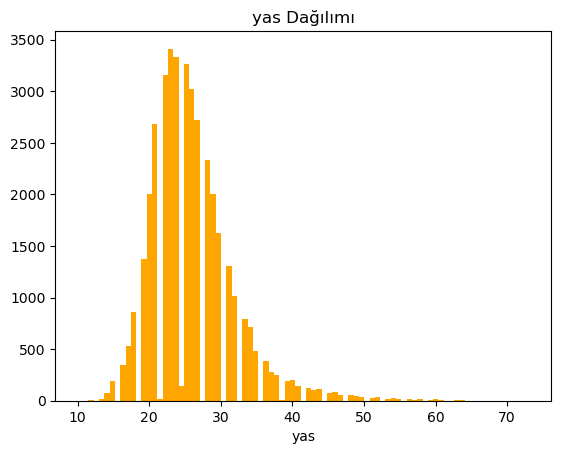

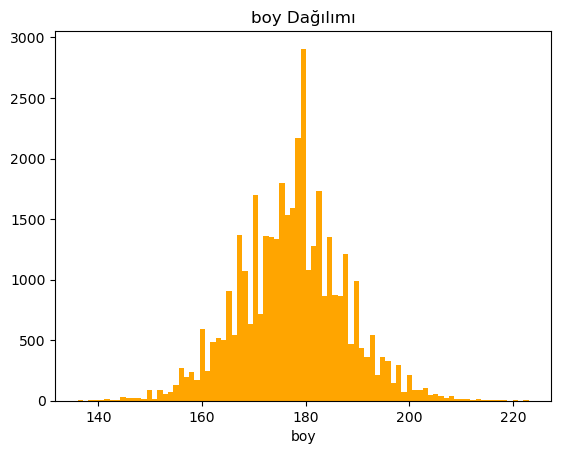

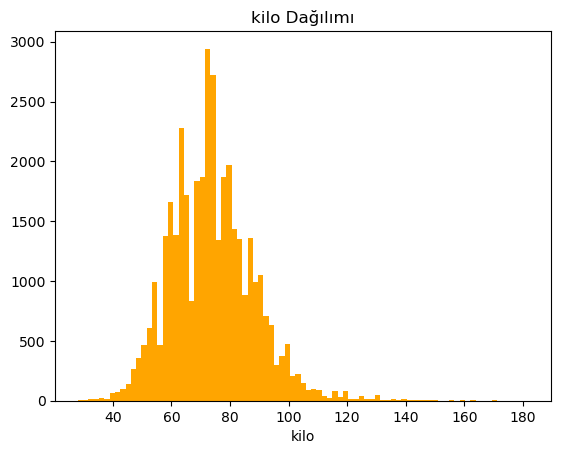

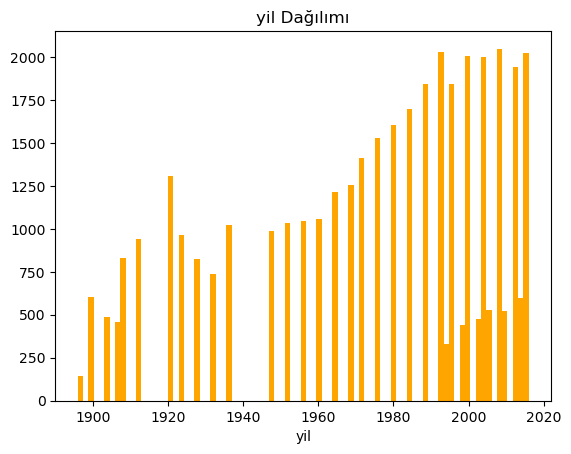

In [10]:
# Tek değişkenli veri analizi

def plotHist(degisken, bins_count, renk):
    plt.figure()
    plt.hist(df[degisken], bins = bins_count, color = renk)
    plt.xlabel(degisken)
    plt.title(f'{degisken} Dağılımı')
    plt.show()

num_feature = ["yas", "boy", "kilo", "yil"]

for col in num_feature:
    plotHist(col, 85, 'orange')

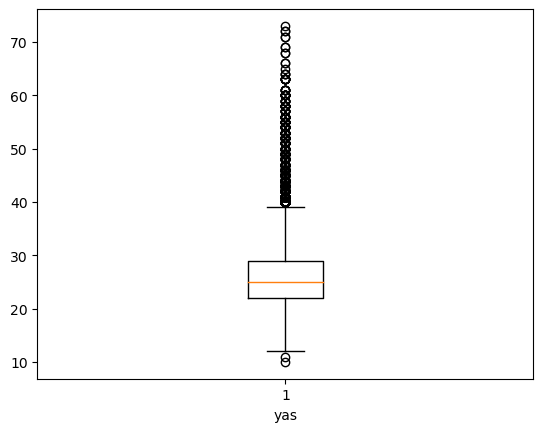

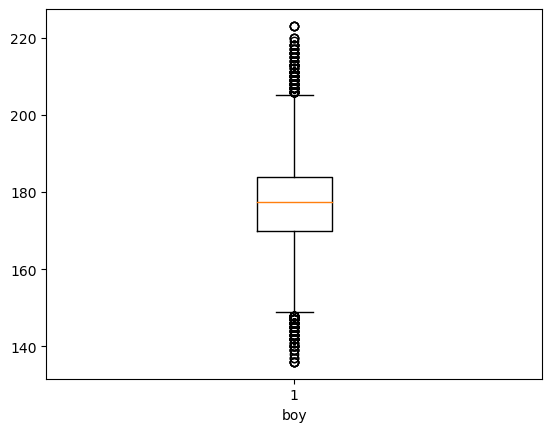

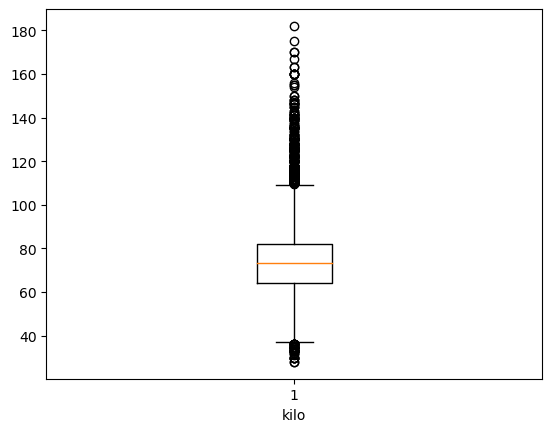

In [13]:
def plotBox(degisken):
    plt.figure()
    plt.boxplot(df[degisken])
    plt.xlabel(degisken)
    plt.show()

num_feature = ["yas", "boy", "kilo"]
for col in num_feature:
    plotBox(col)